17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 431ms/step - accuracy: 0.5694 - loss: 0.6709 - val_accuracy: 0.7249 - val_loss: 0.5456
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 194s 412ms/step - accuracy: 0.7882 - loss: 0.4629 - val_accuracy: 0.7775 - val_loss: 0.4802
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 413ms/step - accuracy: 0.8397 - loss: 0.3750 - val_accuracy: 0.7749 - val_loss: 0.4737
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 170s 435ms/step - accuracy: 0.7742 - loss: 0.4823 - val_accuracy: 0.6282 - val_loss: 0.6310
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 190s 405ms/step - accuracy: 0.7345 - loss: 0.5237 - val_accuracy: 0.7016 - val_loss: 0.5924
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step - accuracy: 0.6966 - loss: 0.5957
Test loss: 0.592418372631073
Test accuracy: 0.7015600204467773


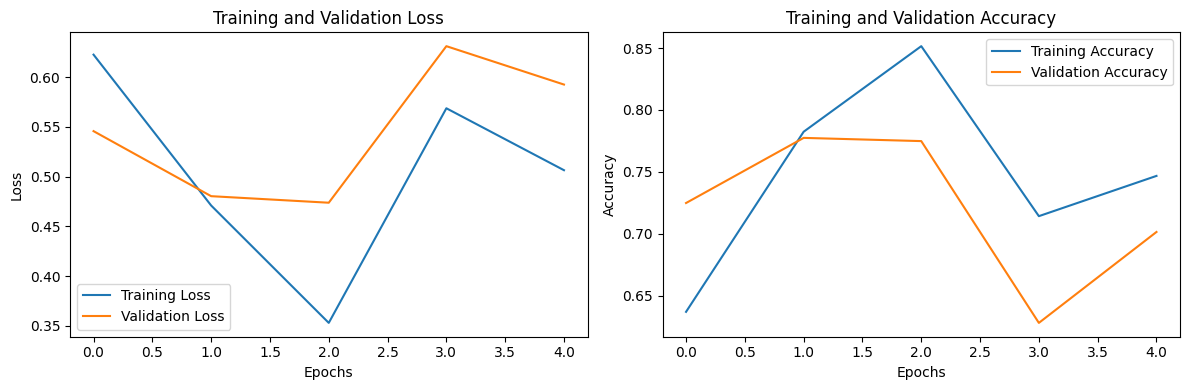

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

# 1. Load the IMDB dataset
max_features = 10000  # Use the top 10,000 words
max_len = 500  # Limit review length to 500 words

# Load data: The data is already preprocessed with integer-encoded words.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 2. Preprocess the data (Pad sequences to ensure uniform length)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 3. Define the Simple RNN model
model = Sequential()

# Embedding layer to convert word indices into dense vectors
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))

# Simple RNN layer
model.add(SimpleRNN(128))

# Output layer for binary classification (positive or negative review)
model.add(Dense(1, activation='sigmoid'))

# 4. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the model and store the history
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# 6. Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

# 7. Plot the training and validation loss
plt.figure(figsize=(12, 4))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()